## Dependencies

In [69]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

## Reading Data

In [43]:
# Specify the path to your Excel file
excel_file_path = 'P_Data_Extract_From_Health_Nutrition_and_Population_Statistics.xlsx'

# Load the Excel file
df = pd.read_excel(excel_file_path, sheet_name='Data', header=0)


df = df.set_index('Year')
df = df.T
df

Year,Incidence of tuberculosis,Incidence of HIV,Incidence of malaria,Current health expenditure
2000,96.0,3.17,189.410245,3.575834
2001,83.0,2.90,179.824734,3.316000
2002,89.0,2.69,164.328084,3.131222
2003,100.0,2.50,143.762156,6.934918
2004,93.0,2.27,125.304643,7.509300
2005,102.0,2.07,153.506326,7.725500
2006,112.0,1.86,150.639381,7.609599
2007,106.0,1.44,88.264641,7.862126
2008,101.0,1.22,69.889724,7.567043
2009,95.0,1.09,153.992483,7.806949


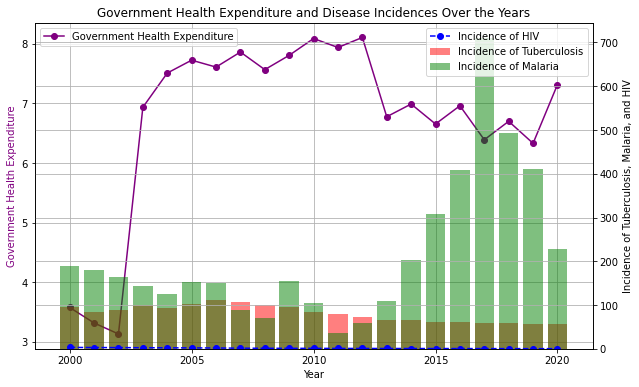

In [79]:
years = range(2000, 2021)
incidence_hiv = df['Incidence of HIV']
incidence_tb = df['Incidence of tuberculosis']
incidence_malaria = df['Incidence of malaria']
expenditure = df['Current health expenditure']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the line graph for Government Health Expenditure
ax1.plot(years, expenditure, color='purple', marker='o', label='Government Health Expenditure')

# Creating a twin axis for the bar plots
ax2 = ax1.twinx()

# Plotting the bar graphs for Tuberculosis and Malaria
ax2.bar(years, incidence_tb, color='red', alpha=0.5, label='Incidence of Tuberculosis')
ax2.bar(years, incidence_malaria, color='green', alpha=0.5, label='Incidence of Malaria')

# Adding a line plot for HIV incidence
ax2.plot(years, incidence_hiv, color='blue', marker='o', label='Incidence of HIV', linestyle='dashed')

# Adding labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Government Health Expenditure', color='purple')
ax2.set_ylabel('Incidence of Tuberculosis, Malaria, and HIV', color='black')
plt.title('Government Health Expenditure and Disease Incidences Over the Years')

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adding grid to both axes
ax1.grid(True)
ax2.grid(True)

# Show the plot
plt.show()

## Predictions

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2000 to 2020
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Incidence of tuberculosis   21 non-null     float64
 1   Incidence of HIV            21 non-null     float64
 2   Incidence of malaria        21 non-null     float64
 3   Current health expenditure  21 non-null     float64
dtypes: float64(4)
memory usage: 840.0+ bytes


In [49]:
df['Incidence of HIV'].corr(df['Current health expenditure'])

-0.5740425070739028

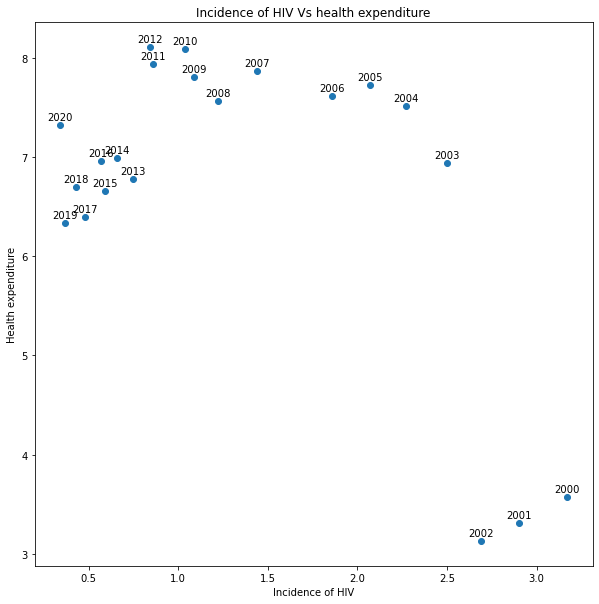

In [65]:
plt.figure(figsize=(10,10))
# Scatter plot
plt.scatter(df['Incidence of HIV'], df['Current health expenditure'])

# Annotate each point with its corresponding year
for x, y, year in zip(df['Incidence of HIV'], df['Current health expenditure'], range(2000, 2021)):
    plt.annotate(year, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Labels and title
plt.xlabel('Incidence of HIV')
plt.ylabel('Health expenditure')
plt.title('Incidence of HIV Vs health expenditure')

# Show the plot
plt.show()


In [72]:
df['Incidence of tuberculosis'].corr(df['Current health expenditure'])

0.04256881437243585

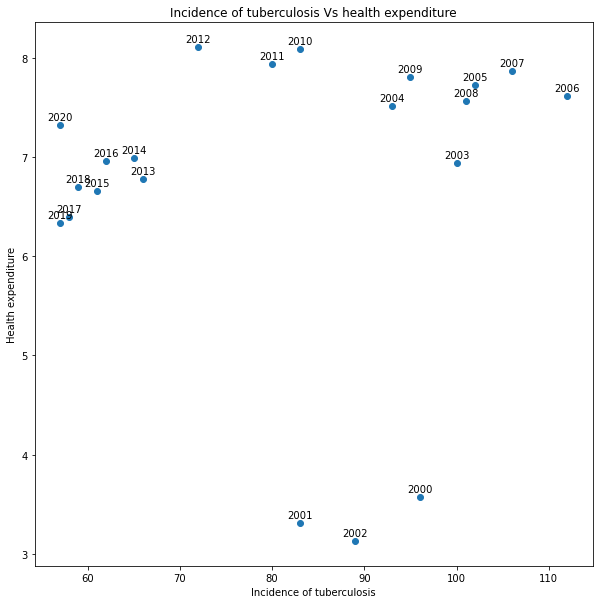

In [73]:
plt.figure(figsize=(10,10))
# Scatter plot
plt.scatter(df['Incidence of tuberculosis'], df['Current health expenditure'])

# Annotate each point with its corresponding year
for x, y, year in zip(df['Incidence of tuberculosis'], df['Current health expenditure'], range(2000, 2021)):
    plt.annotate(year, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Labels and title
plt.xlabel('Incidence of tuberculosis')
plt.ylabel('Health expenditure')
plt.title('Incidence of tuberculosis Vs health expenditure')

# Show the plot
plt.show()


In [51]:
df['Incidence of malaria'].corr(df['Current health expenditure'])

-0.1876432238705891

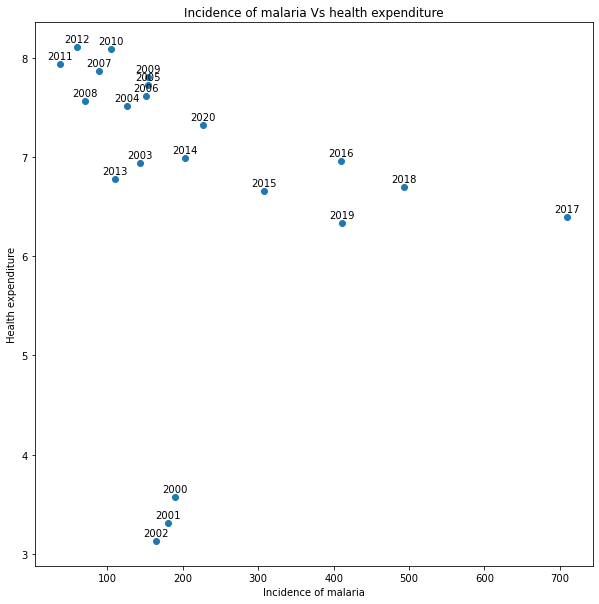

In [75]:
plt.figure(figsize=(10,10))
# Scatter plot
plt.scatter(df['Incidence of malaria'], df['Current health expenditure'])

# Annotate each point with its corresponding year
for x, y, year in zip(df['Incidence of malaria'], df['Current health expenditure'], range(2000, 2021)):
    plt.annotate(year, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Labels and title
plt.xlabel('Incidence of malaria')
plt.ylabel('Health expenditure')
plt.title('Incidence of malaria Vs health expenditure')

# Show the plot
plt.show()


In [76]:
X = df[['Current health expenditure']]
y_tuberculosis = df['Incidence of tuberculosis']
y_HIV = df['Incidence of HIV']
y_malaria = df['Incidence of malaria']

# Split the data into training and testing sets
X_train, X_test, y_train_tuberculosis, y_test_tuberculosis, y_train_HIV, y_test_HIV, y_train_malaria, y_test_malaria = train_test_split(
    X, y_tuberculosis, y_HIV, y_malaria, test_size=0.2, random_state=42)

# Create linear regression models
model_tuberculosis = RandomForestRegressor()
model_HIV = RandomForestRegressor()
model_malaria = RandomForestRegressor()

# Train the models
model_tuberculosis.fit(X_train, y_train_tuberculosis)
model_HIV.fit(X_train, y_train_HIV)
model_malaria.fit(X_train, y_train_malaria)

# Make predictions on the testing set
y_pred_tuberculosis = model_tuberculosis.predict(X_test)
y_pred_HIV = model_HIV.predict(X_test)
y_pred_malaria = model_malaria.predict(X_test)

# Evaluate the models
mse_tuberculosis = mean_squared_error(y_test_tuberculosis, y_pred_tuberculosis)
mse_HIV = mean_squared_error(y_test_HIV, y_pred_HIV)
mse_malaria = mean_squared_error(y_test_malaria, y_pred_malaria)


r2_malaria = r2_score(y_test_malaria, y_pred_malaria)
r2_HIV = r2_score(y_test_HIV, y_pred_HIV)
r2_tuberculosis = r2_score(y_test_tuberculosis, y_pred_tuberculosis)

# Display the mean squared error
print(f'Mean Squared Error for Tuberculosis: {mse_tuberculosis}')
print(f'Mean Squared Error for HIV: {mse_HIV}')
print(f'Mean Squared Error for Malaria: {mse_malaria}')
print(f'R2 for Malaria: {r2_malaria}')
print(f'R2 for HIV : {r2_HIV}')
print(f'R2 for tuberculosis: {r2_tuberculosis}')
# Predict the incidence for the year 2023
expenditure_2023 = np.array([[7.5]])  # Replace with the actual health expenditure value for 2023
prediction_tuberculosis = model_tuberculosis.predict(expenditure_2023)
prediction_HIV = model_HIV.predict(expenditure_2023)
prediction_malaria = model_malaria.predict(expenditure_2023)

# Display the predictions for 2023
print(f'Predicted Incidence of Tuberculosis in 2023: {prediction_tuberculosis[0]}')
print(f'Predicted Incidence of HIV in 2023: {prediction_HIV[0]}')
print(f'Predicted Incidence of Malaria in 2023: {prediction_malaria[0]}')

Mean Squared Error for Tuberculosis: 65.96192000000003
Mean Squared Error for HIV: 0.6096133900000011
Mean Squared Error for Malaria: 22763.223736918593
R2 for Malaria: 0.5396625163104294
R2 for HIV : 0.5344956001026278
R2 for tuberculosis: 0.7873293783853494
Predicted Incidence of Tuberculosis in 2023: 95.09
Predicted Incidence of HIV in 2023: 1.942600000000003
Predicted Incidence of Malaria in 2023: 142.86369852068913


C:\Users\Moise Niyonkuru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Moise Niyonkuru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Moise Niyonkuru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
